In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import random

1.

In [108]:
def posterior_grid(grid_points=50, heads=6, tails=9):
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1/grid_points, grid_points)
    likelihood = stats.binom.pmf(heads, heads+tails, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    return grid, posterior

In [76]:
def draw_graph_grid(data, points):
    h = data.sum()
    t = len(data) - h
    grid, posterior = posterior_grid(points, h, t)
    plt.plot(grid, posterior, 'o-')
    plt.title(f'heads = {h}, tails = {t}')
    plt.yticks([])
    plt.xlabel('θ')

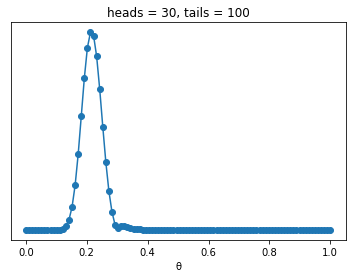

In [77]:
draw_graph_grid(np.repeat([0, 1], (100, 30)), 100)


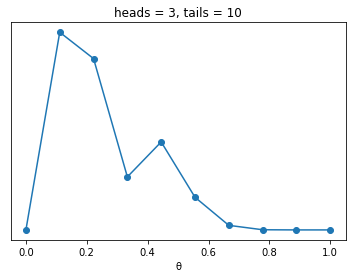

In [78]:
draw_graph_grid(np.repeat([0, 1], (10, 3)), 10)

Now, we can observe that if our dataset increases ten times we obtain a different estimation, we obtained a more Gaussian-like distribution, however, when our dataset is smaller we obtain a mixture of Gaussian distributions.

2.

In [79]:
def get_errors(n, iterations=500):
    errors = []
    
    for i in range(iterations):
        x, y = np.random.uniform(-1, 1, size=(2, n))
        inside = (x**2 + y**2) <= 1
        pi = inside.sum()*4/n
        errors.append(abs((pi - np.pi) / pi) * 100)
        outside = np.invert(inside)
        
    return errors

In [80]:
# N = 100, 1000 and 10000
n_values = [100, 1000, 10000]
n_errors = []
for n in n_values:
    n_errors.append(np.array(get_errors(n)))

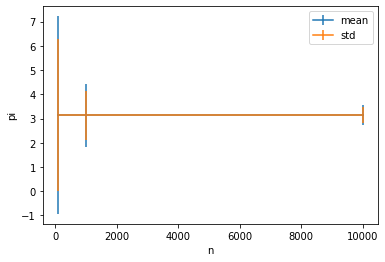

In [81]:
plt.errorbar(n_values, np.repeat(np.pi, len(n_values)), yerr = [errors.mean() for errors in n_errors],
             label ='mean')
plt.errorbar(n_values, np.repeat(np.pi, len(n_values)), yerr = [errors.std() for errors in n_errors],
             label ='std')
plt.xlabel("n")
plt.ylabel("pi")
plt.legend(loc ='upper right')

In [38]:
print([errors.mean() for errors in n_errors])

[4.057211978593535, 1.1587596282130799, 0.45118949860644264]


As we can observe above, as we increase our n the std and mean of our errors are smaller, thus as we increase how much data we plot using the Monte Carlo method, we increase our prediction quality about pi.

3.

In [82]:
def metropolis(func, draws=10000):
    """A very simple Metropolis implementation"""
    trace = np.zeros(draws)
    old_x = 0.5 # func.mean()
    old_prob = func.pdf(old_x)
    delta = np.random.normal(0, 0.5, draws)
    for i in range(draws):
        new_x = old_x + delta[i]
        new_prob = func.pdf(new_x)
        acceptance = new_prob / old_prob
        if acceptance >= np.random.random():
            trace[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            trace[i] = old_x
    return trace

In [83]:
def draw_graph_metropolis(func):
    trace = metropolis(func=func)
    x = np.linspace(0.01, .99, 100)
    y = func.pdf(x)
    plt.xlim(0, 1)
    plt.plot(x, y, 'C1-', lw=3, label='True distribution')
    plt.hist(trace[trace > 0], bins=25, density=True, label='Estimated distribution')
    plt.xlabel('x')
    plt.ylabel('pdf(x)')
    plt.yticks([])
    plt.legend()

In [94]:
beta_params = [[1, 1], [20, 20], [1, 4]]
funcs = []
for beta_param in beta_params:
    funcs.append(stats.beta(beta_param[0], beta_param[1]))

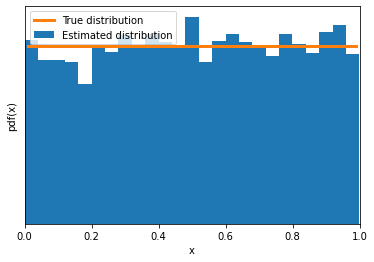

In [95]:
draw_graph_metropolis(func = funcs[0])

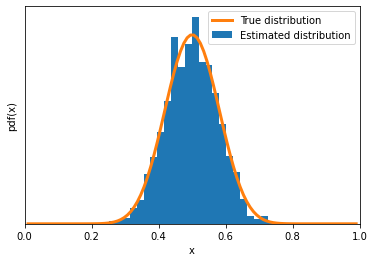

In [96]:
draw_graph_metropolis(func = funcs[1])

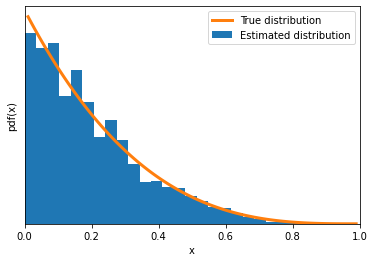

In [97]:
draw_graph_metropolis(func = funcs[2])

In [127]:
probs = []
for beta_param in beta_params:
    probs.append(stats.beta.rvs(beta_param[0], beta_param[1]))
    
data_size = 10000
datas = []
for prob in probs:
    datas.append(stats.bernoulli.rvs(prob, size=data_size))

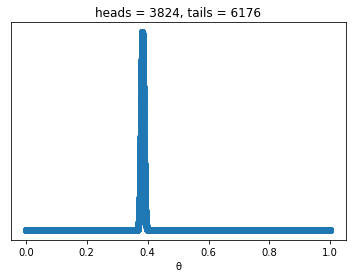

In [134]:
draw_graph_grid(datas[0], data_size)

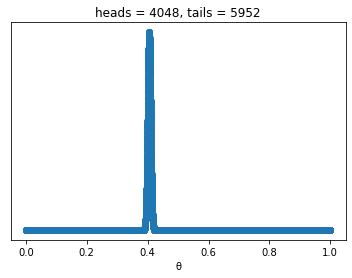

In [135]:
draw_graph_grid(datas[1], data_size)

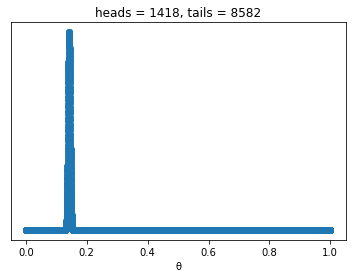

In [137]:
draw_graph_grid(datas[2], data_size)